In [1]:
t = (10-5)%/%2
t

[1] 2

## es2 - Random Number Generator
Middle-square algorithm


In [22]:
#function to extract the center of a number
center <- function(x) {
    x_char <- unlist(strsplit(as.character(format(x, scientific=FALSE)),""))
    x2_char <- unlist(strsplit(as.character(format(x^2, scientific=FALSE)),""))
    x_len <- length(x_char)
    x2_len <- length(x2_char)
    x_half <- as.integer(x_len/2)
    x2_half <- as.integer(x2_len/2)
    if(x_len%%2==0){ #lunghezza di x è pari
    res <- x2_char[(x2_half - x_half + 1):(x2_half + x_half)]
        }else{ #lunghezza di x è dispari
    res <- x2_char[(x2_half - x_half):(x2_half + x_half)]
    }
    return(as.numeric(paste(res, collapse="")))
}


Middle_squared <- function(x,n) {
    #arguments: n == how many random numbers do you want 
            #   x == the number of k digits to start
    #returns n random numbers of length k 
    k <- length(unlist(strsplit(as.character(format(x, scientific=FALSE)),"")))
    x_squared <- x^2
    x_char <- unlist(strsplit(as.character(x_squared),""))
    # random <- x_char[]

}

In [24]:
x <- 12345678
try <- center(x)
try

[1] 41576527

## es3 - Bayesian Inference

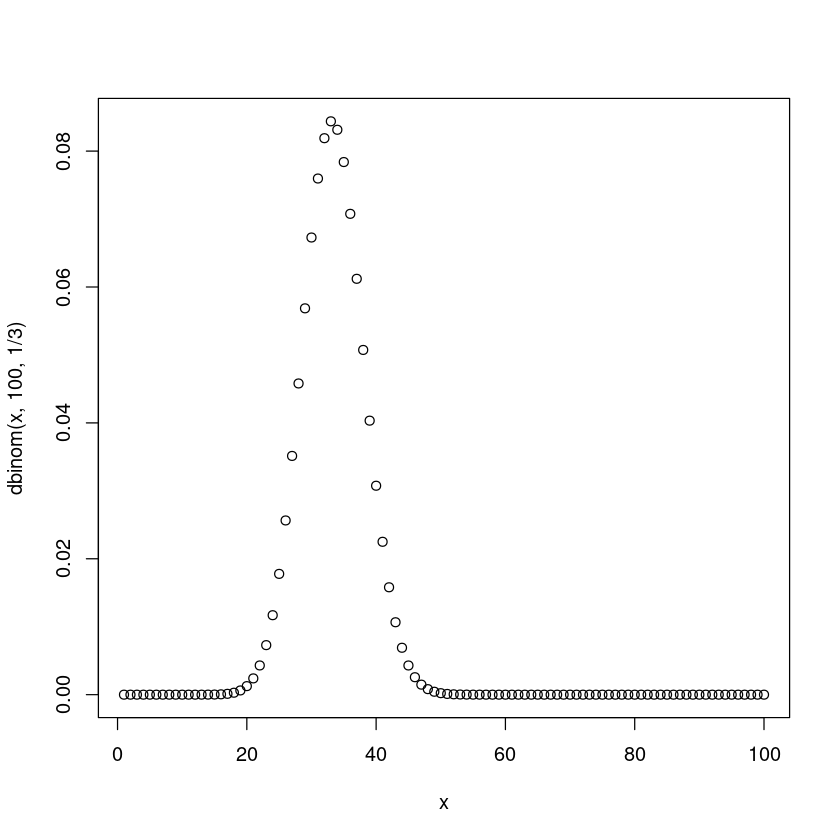